## OBJECTIVE :

### Predicting text emotions

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
import os
import sys
import ipdb
import numpy as np
import pandas as pd
import spacy
from wordcloud import WordCloud, STOPWORDS

print("Numpy Version : ", np.__version__)
print("Pandas Version : ", pd.__version__)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

print("Matplotlib Version : ", mpl.__version__)

Numpy Version :  1.18.1
Pandas Version :  1.0.1
Matplotlib Version :  3.1.3


In [23]:
from sklearn.preprocessing import LabelEncoder

In [4]:
DATA_DIR = "../data/"
OBJECT_DIR = "../objects/"
LOG_DIR = "../logs/"

In [5]:
LUCKY_SEED = 42

In [6]:
RAW_DATA_DIR = os.path.join(DATA_DIR, "raw_data")

In [32]:
# Read train data
train_data = pd.read_csv(os.path.join(RAW_DATA_DIR, "raw_train_data.csv"))
print("Shape of train data : {}".format(train_data.shape))
print()
print("Features in train data : {}".format(train_data.columns.values))
print()
print("Train Dataframe Information : ")
print(train_data.info())

Shape of train data : (29477, 2)

Features in train data : ['content' 'type']

Train Dataframe Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29477 entries, 0 to 29476
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  29477 non-null  object
 1   type     29477 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 460.7+ KB
None


In [33]:
# Read test data
test_data = pd.read_csv(os.path.join(RAW_DATA_DIR, "raw_test_data.csv"))
print("Shape of test data : {}".format(test_data.shape))
print()
print("Features in test data : {}".format(test_data.columns.values))
print()
print("Test Dataframe Information : ")
print(test_data.info())
print()
print("-" * 104)
print()
test_data_kaggle = pd.read_csv(os.path.join(RAW_DATA_DIR, "raw_test_data_kaggle.csv"))
print("Shape of kaggle test data : {}".format(test_data_kaggle.shape))
print()
print("Features in kaggle test data : {}".format(test_data_kaggle.columns.values))
print()
print("Kaggle Test Dataframe Information : ")
print(test_data_kaggle.info())

Shape of test data : (7370, 2)

Features in test data : ['content' 'type']

Test Dataframe Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370 entries, 0 to 7369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  7370 non-null   object
 1   type     7370 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 115.3+ KB
None

--------------------------------------------------------------------------------------------------------

Shape of kaggle test data : (10000, 2)

Features in kaggle test data : ['id' 'content']

Kaggle Test Dataframe Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10000 non-null  int64 
 1   content  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB
None


#### Analysis of training data

In [34]:
train_data.drop_duplicates(subset="content").shape, train_data.shape, train_data.drop_duplicates().shape

((29477, 2), (29477, 2), (29477, 2))

In [35]:
train_data["type"].value_counts() / train_data.shape[0]

13    0.201242
9     0.171761
11    0.169386
6     0.124673
4     0.059945
8     0.055976
0     0.047732
12    0.043627
7     0.032229
5     0.029515
10    0.027683
2     0.017810
3     0.014147
1     0.004275
Name: type, dtype: float64

Different types of emotions and their counts : 


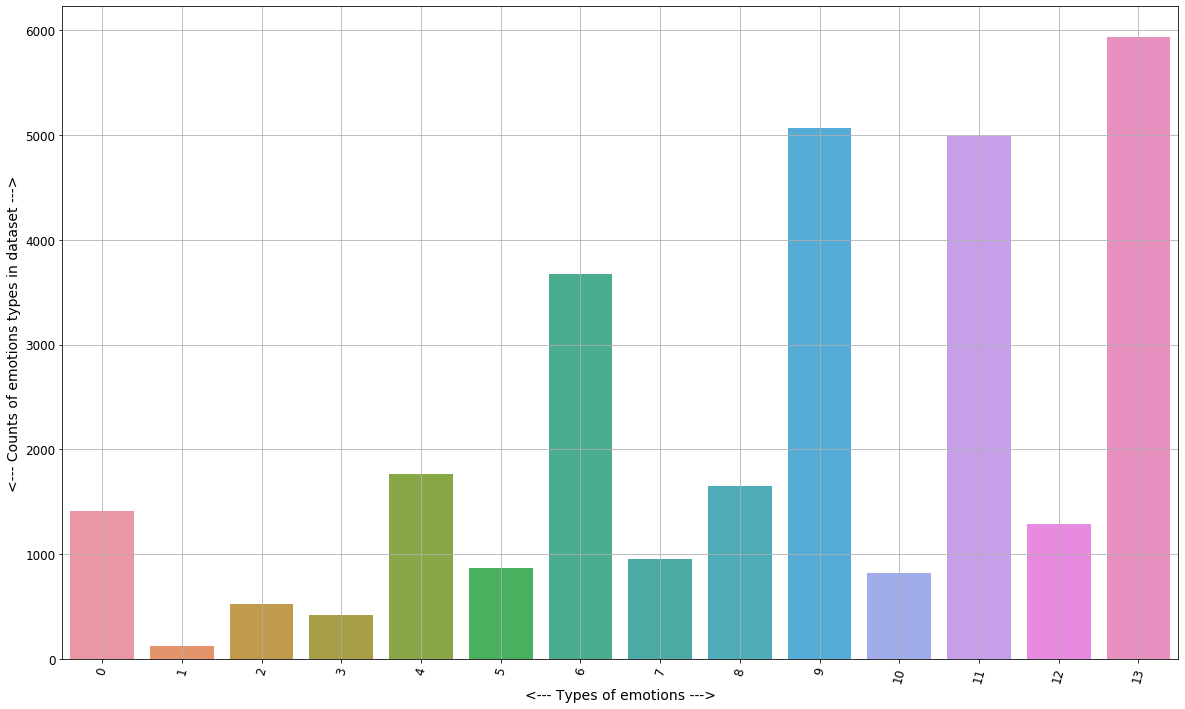

In [36]:
print('Different types of emotions and their counts : ')
fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(train_data['type'].value_counts().index, train_data['type'].value_counts().values)
plt.xticks(rotation=75)
plt.grid()
plt.xlabel('<--- Types of emotions --->')
plt.ylabel('<--- Counts of emotions types in dataset --->')
plt.show()

In [37]:
train_data["lcased_text"] = train_data["content"].map(lambda x:x.lower())

In [40]:
def create_wordcloud(sentences, label):
    print("Target Type : ", label)
    fig_dims = (20, 12)
    text = ' '.join(sentences) 
    wordcloud = WordCloud(stopwords=STOPWORDS, max_words=200, background_color="white").generate(text)
    fig, ax = plt.subplots(figsize=fig_dims)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Target Type :  1


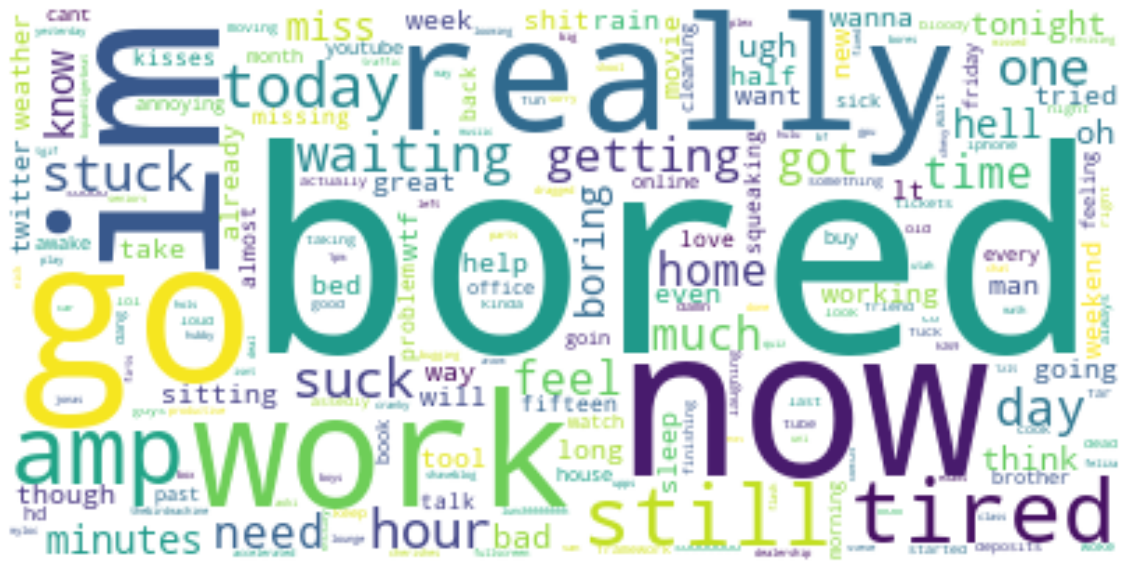

Target Type :  13


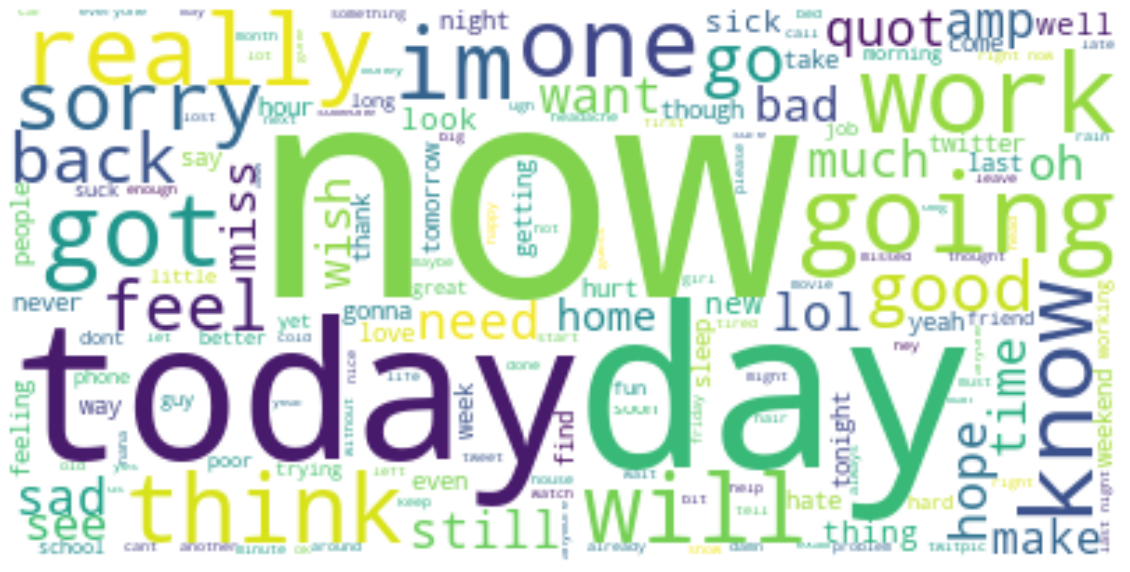

Target Type :  2


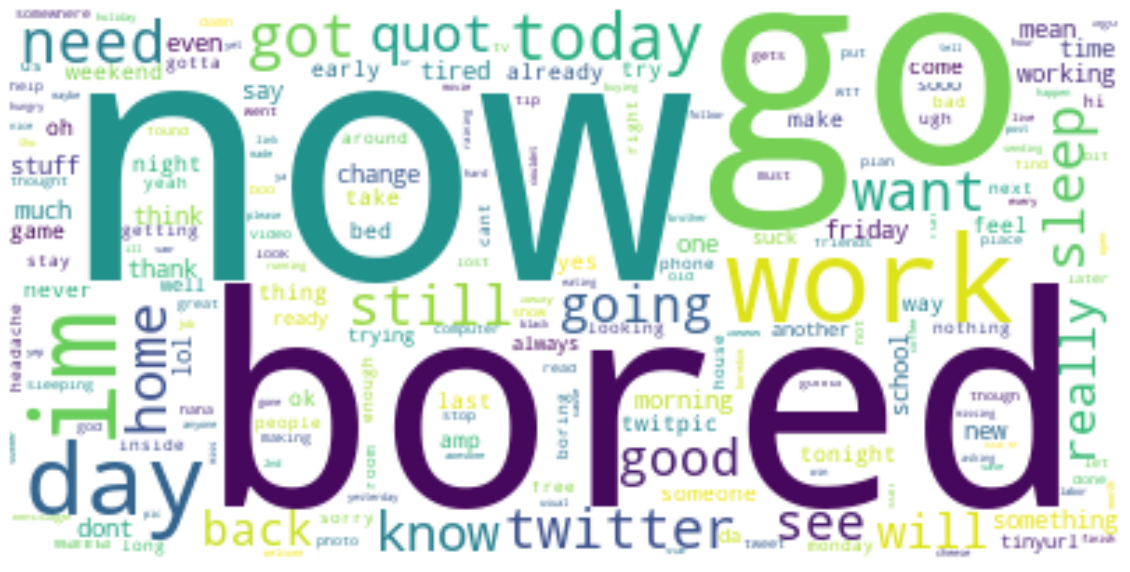

Target Type :  9


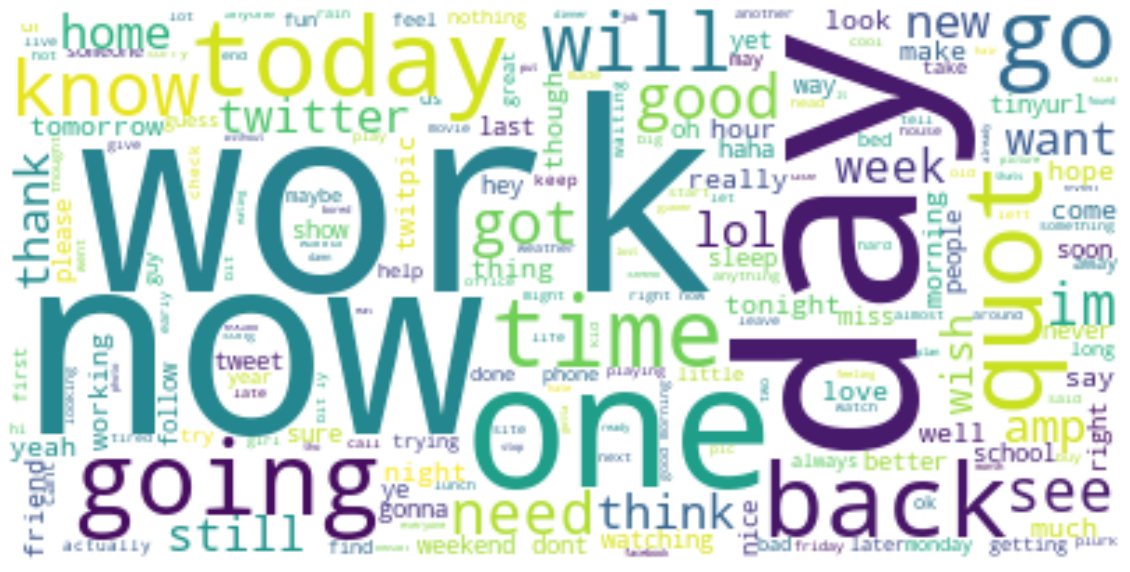

Target Type :  4


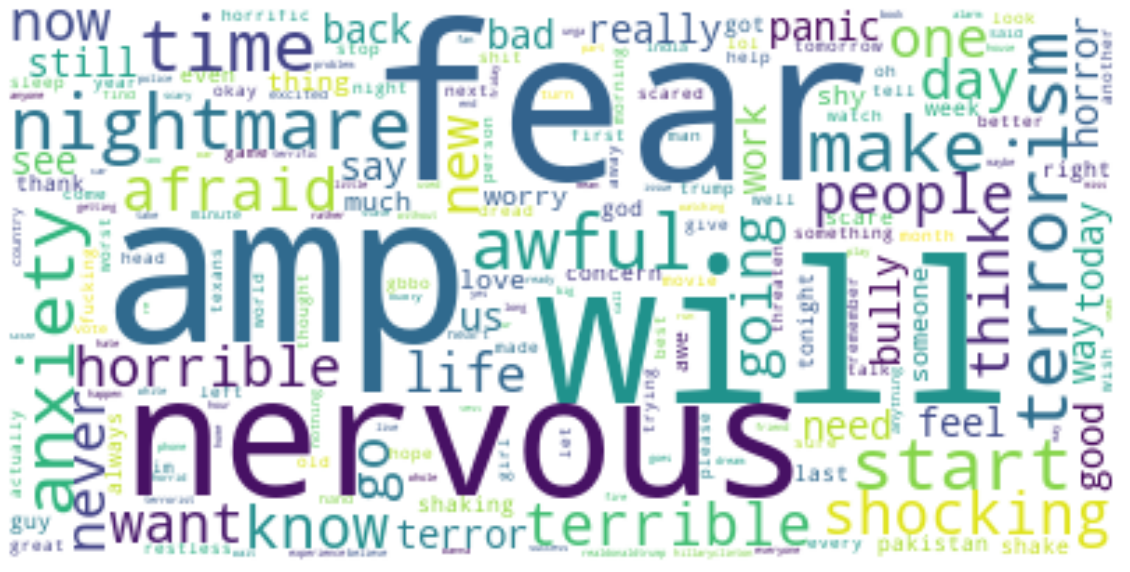

Target Type :  0


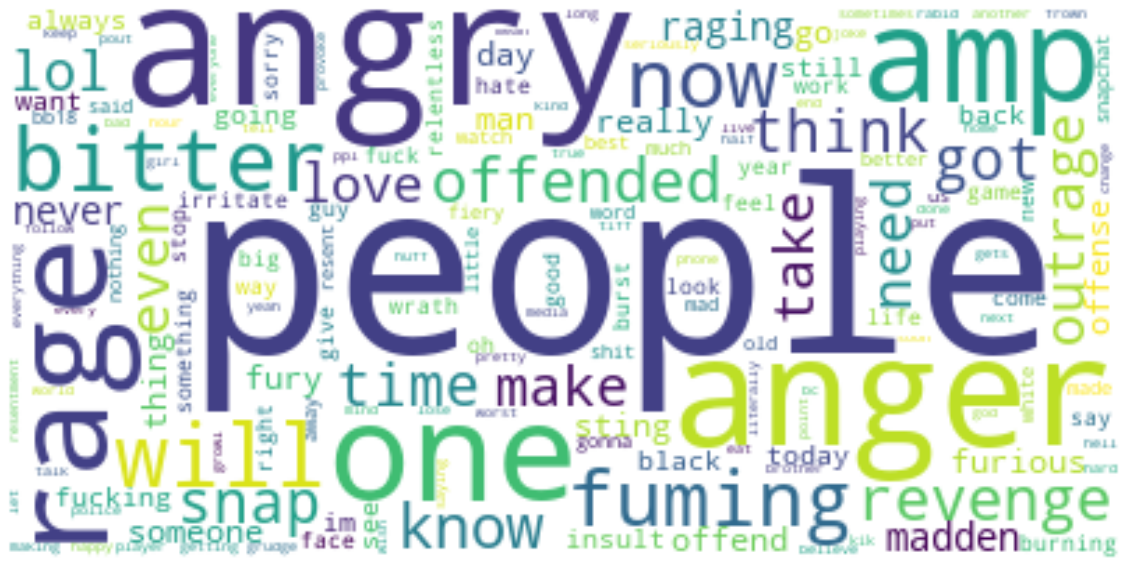

Target Type :  11


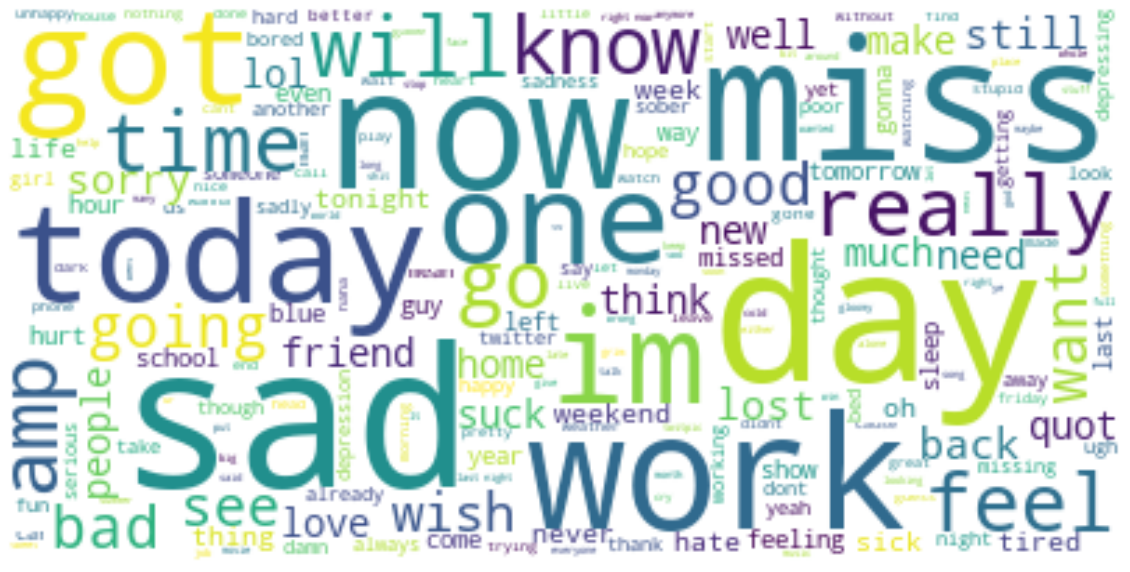

Target Type :  6


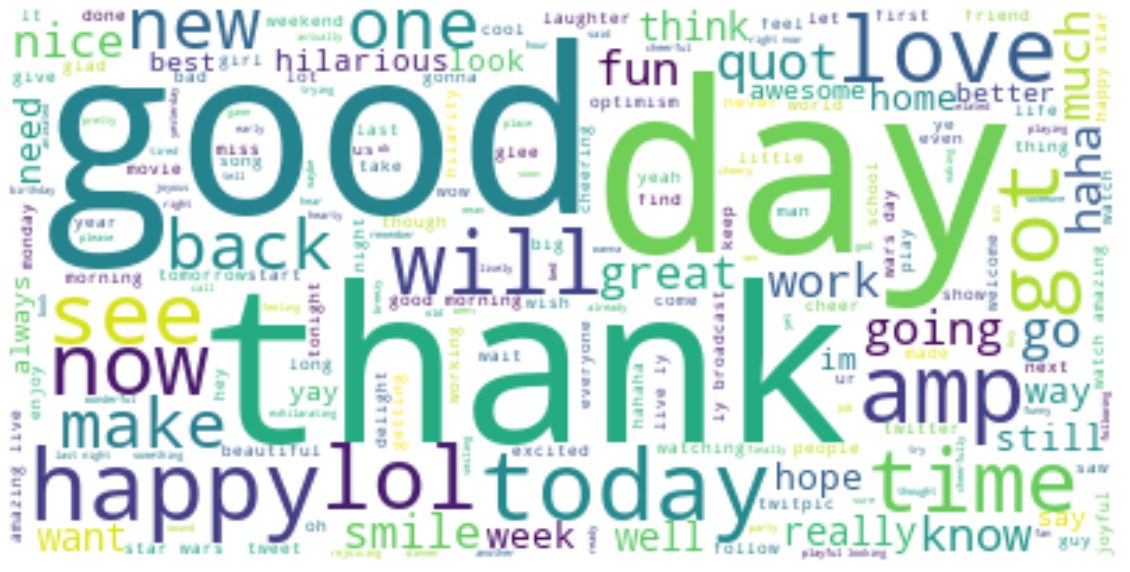

Target Type :  10


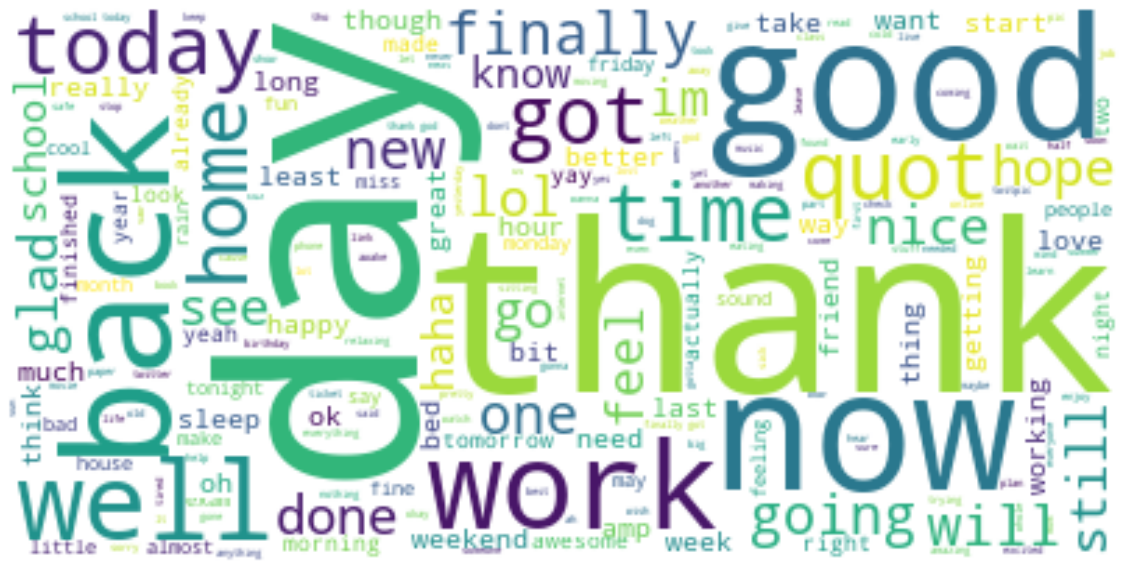

Target Type :  8


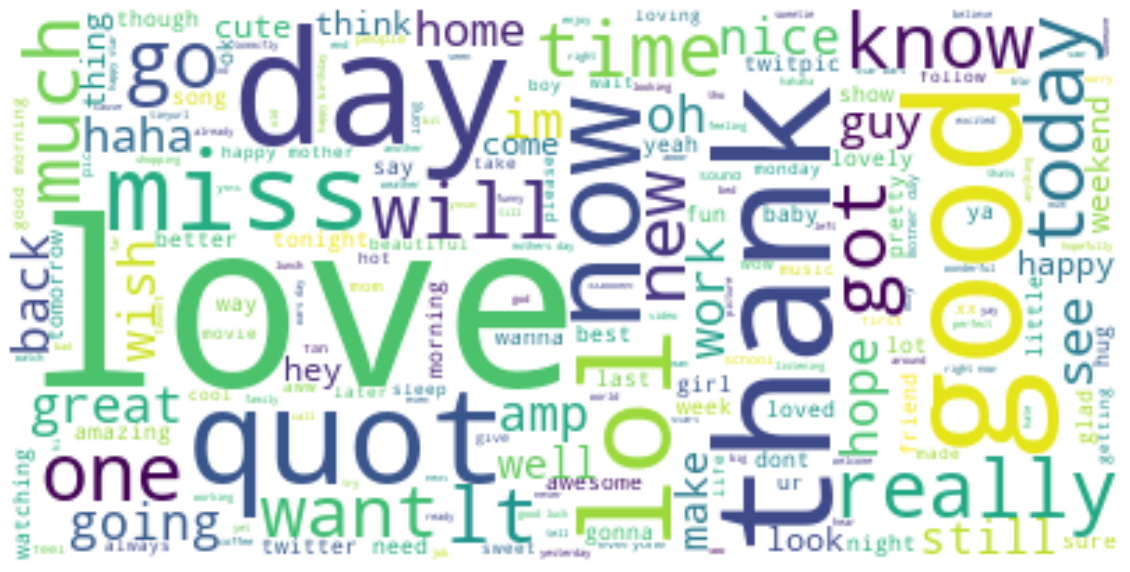

Target Type :  7


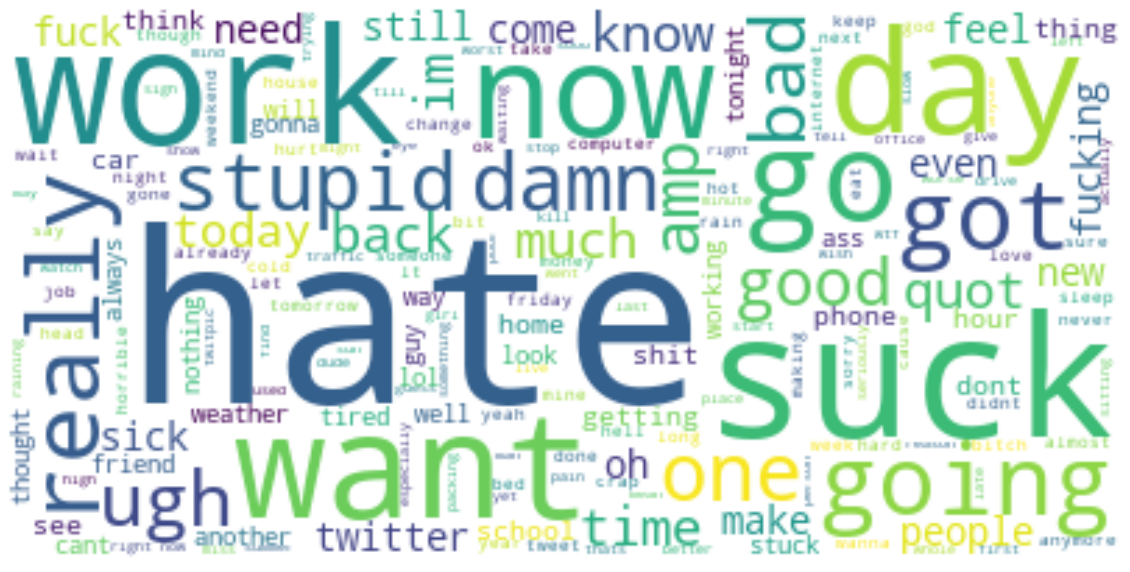

Target Type :  5


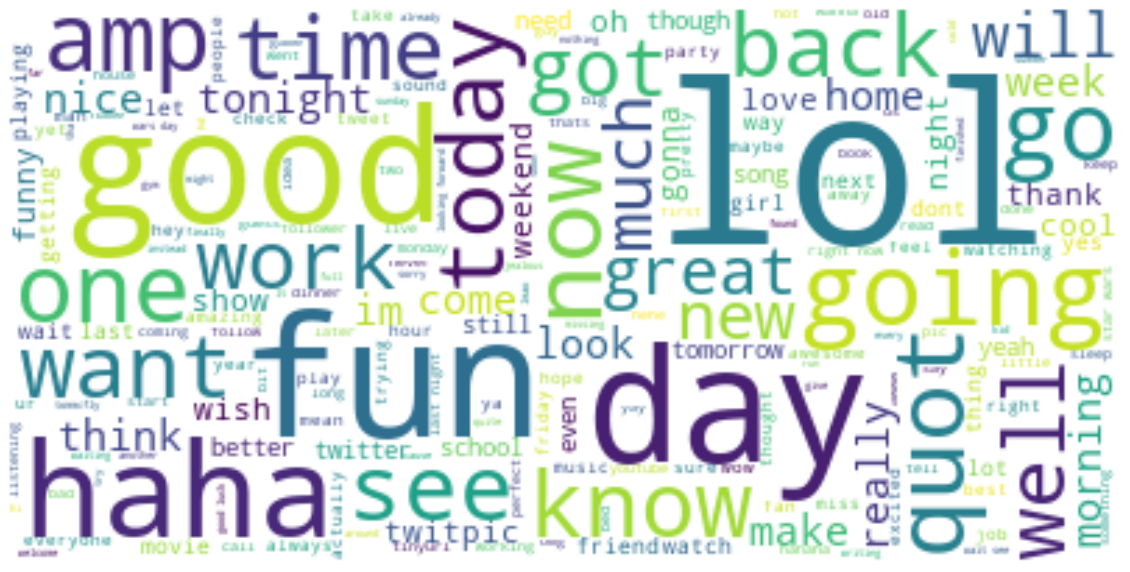

Target Type :  3


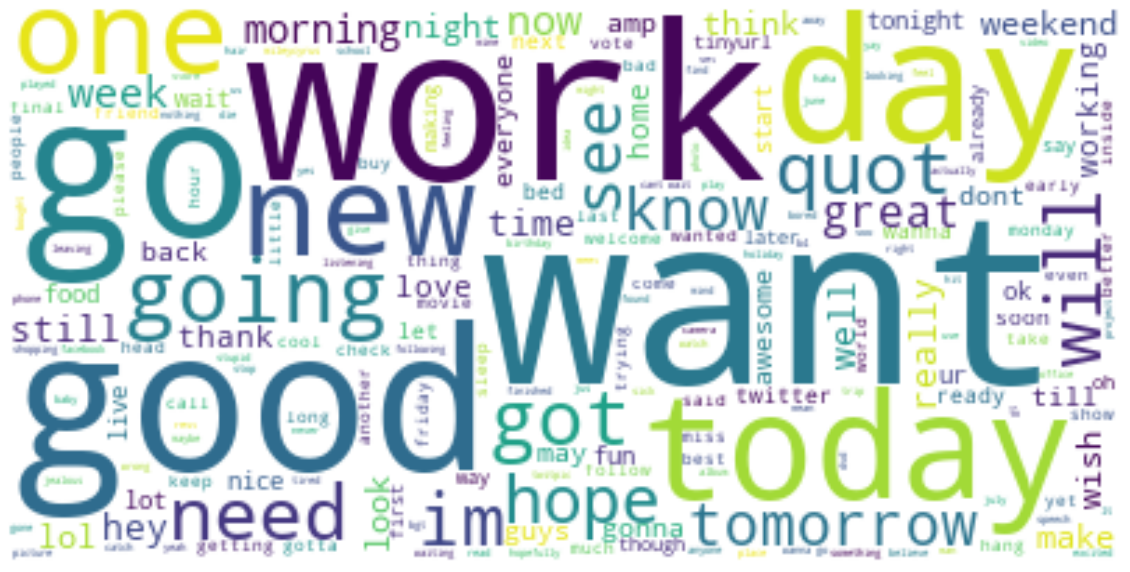

Target Type :  12


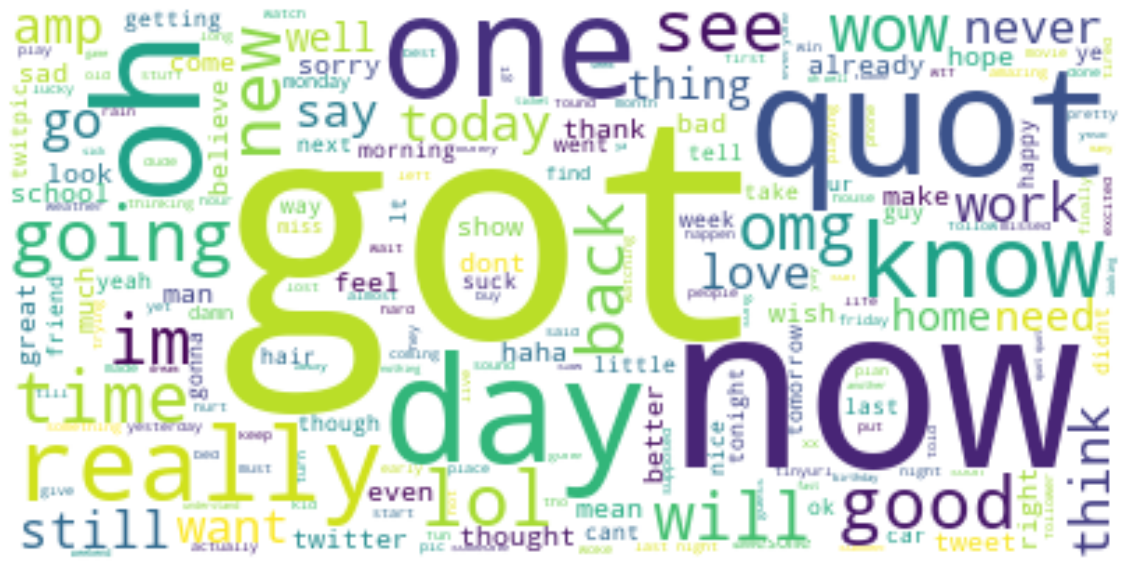

In [44]:
for t in train_data["type"].unique():
    create_wordcloud(train_data.loc[train_data["type"]==t, "lcased_text"].values, str(t))